In [24]:
import warnings
warnings.filterwarnings("ignore")

In [26]:
import pandas as pd
from statsbombpy import sb

df = sb.events(match_id=3942382)



In [28]:
df.columns

Index(['50_50', 'bad_behaviour_card', 'ball_receipt_outcome',
       'ball_recovery_recovery_failure', 'block_deflection',
       'block_save_block', 'carry_end_location', 'clearance_aerial_won',
       'clearance_body_part', 'clearance_head', 'clearance_left_foot',
       'clearance_right_foot', 'counterpress', 'dribble_nutmeg',
       'dribble_outcome', 'duel_outcome', 'duel_type', 'duration',
       'foul_committed_advantage', 'foul_committed_card',
       'foul_committed_offensive', 'foul_committed_type', 'foul_won_advantage',
       'foul_won_defensive', 'goalkeeper_body_part', 'goalkeeper_end_location',
       'goalkeeper_outcome', 'goalkeeper_position',
       'goalkeeper_shot_saved_to_post', 'goalkeeper_technique',
       'goalkeeper_type', 'id', 'index', 'injury_stoppage_in_chain',
       'interception_outcome', 'location', 'match_id', 'minute',
       'miscontrol_aerial_won', 'off_camera', 'out', 'pass_aerial_won',
       'pass_angle', 'pass_assisted_shot_id', 'pass_body_part

In [30]:
df[["team_id","team"]]

,team_id,team
0,941,Netherlands
1,909,Turkey
2,941,Netherlands
3,909,Turkey
4,909,Turkey
...,...,...
3410,941,Netherlands
3411,909,Turkey
3412,941,Netherlands
3413,909,Turkey


In [32]:
df.type.value_counts().head(10)


type
Pass             965
Ball Receipt*    932
Carry            810
Pressure         242
Ball Recovery     81
Duel              64
Block             40
Clearance         32
Goal Keeper       30
Shot              26
Name: count, dtype: int64

In [34]:
df = df[df['type'] == 'Pass']


In [36]:
df[['x', 'y']] = df['location'].apply(pd.Series)


In [38]:
#e also want to filter just to include successful passes
print(df['pass_outcome'].head(50))

# Statsbomb leaves a pass_outcome of NaN for successful passes and will tell you the outcome of the pass if it was unsuccessful
df = df[df['pass_outcome'].isna()]

6              NaN
7       Incomplete
8              NaN
9       Incomplete
10             NaN
11      Incomplete
12             NaN
13             NaN
14             NaN
15             NaN
16             NaN
17             NaN
18             NaN
19             NaN
20      Incomplete
21      Incomplete
22      Incomplete
23      Incomplete
24             NaN
25             NaN
26             NaN
27      Incomplete
28             NaN
29    Pass Offside
30             NaN
31             NaN
32             NaN
33             NaN
34             NaN
35             NaN
36             NaN
37             NaN
38             NaN
39             NaN
40             NaN
41             NaN
42             NaN
43             NaN
44             NaN
45             NaN
46      Incomplete
47             NaN
48      Incomplete
49             NaN
50      Incomplete
51             NaN
52             NaN
53             NaN
54             NaN
55             NaN
Name: pass_outcome, dtype: object


Text(0.5, 1.0, 'Argentina Staring Pass Locations vs France')

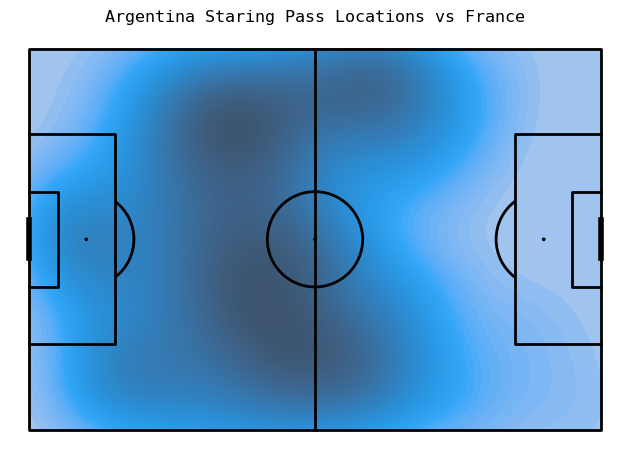

In [40]:
# Now that we only have the successful passes, let's create a heatmap for just Argentina's passes
from mplsoccer import Pitch

# Create a pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='white', line_color='black', line_zorder=2)

fig, ax = pitch.draw()

# filter a temporary dataframe to just include Argentina's passes
# Argentina's team_id is 779
# France's team_id is 771
df_arg = df[df['team_id'] == 909]

# Create a heatmap
# All this is doing is creating a wrapper around seaborn's kdeplot
kde = pitch.kdeplot(
    df_arg.x,
    df_arg.y,
    fill=True, # This will fill the heatmap with color even if there are no events
    thresh=0,
    n_levels=100, # This adjusts the smoothness of the heatmap. The higher the number, the smoother the heatmap will be
    cut=10,
    ax=ax
)

# Let's add a title
ax.set_title('Argentina Staring Pass Locations vs France', fontfamily='monospace')

Text(0.5, 1.0, 'France Staring Pass Locations vs Argentina')

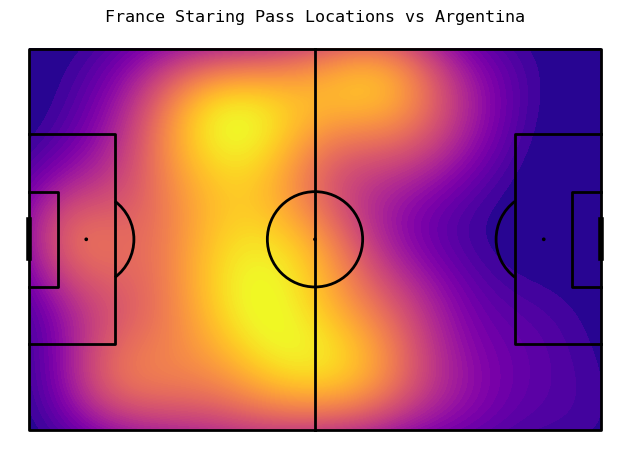

In [42]:
# Now let's create a heatmap for France's passes
fig, ax = pitch.draw()

# filter a temporary dataframe to just include France's passes
df_fra = df[df['team_id'] == 909]

# Create a heatmap
kde = pitch.kdeplot(
    df_fra.x,
    df_fra.y,
    fill=True,
    thresh=0,
    n_levels=100,
    cut=10,
    ax=ax,
    cmap='plasma' # change the color of the heatmap. You can use any of the colormaps from matplotlib. Try 'cividis' or 'plasma'
)

# Let's add a title
ax.set_title('France Staring Pass Locations vs Argentina', fontfamily='monospace')

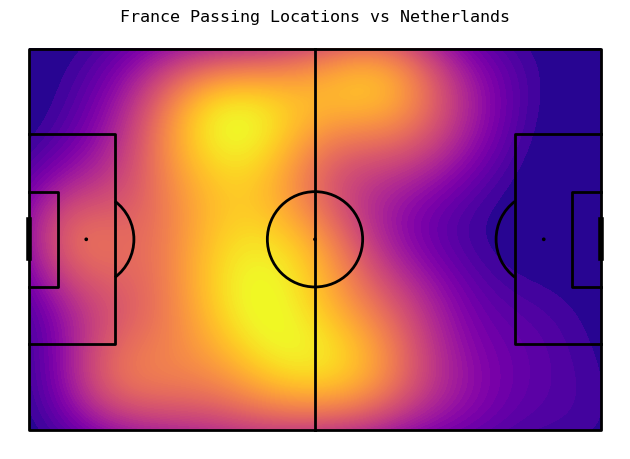

In [44]:
import pandas as pd
from statsbombpy import sb
from mplsoccer import Pitch

# Match ID for Turkey vs Netherlands
match_id = 3942382

# Load event data for the specific match
df = sb.events(match_id=match_id)

# Filter to include only passes
df = df[df['type'] == 'Pass']

# Expand location coordinates
df[['x', 'y']] = df['location'].apply(pd.Series)

# Filter to include only successful passes
df = df[df['pass_outcome'].isna()]

# Create a pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='white', line_color='black', line_zorder=2)

# Create a heatmap for France's passes
fig, ax = pitch.draw()

# Filter a temporary dataframe to just include France's passes
france_team_id = 909  # Update this if France's team ID is different
df_fra = df[df['team_id'] == france_team_id]

# Create a heatmap
kde = pitch.kdeplot(
    df_fra.x,
    df_fra.y,
    fill=True,
    thresh=0,
    n_levels=100,
    cut=10,
    ax=ax,
    cmap='plasma'  # You can use any colormap from matplotlib
)

# Add a title
ax.set_title('France Passing Locations vs Netherlands', fontfamily='monospace')

# Show the plot
fig.show()


In [46]:
df[["player","player_id"]].head(30)

,player,player_id
6,Memphis Depay,2988.0
8,Nathan Aké,3306.0
10,Hakan Çalhanoğlu,7039.0
12,Jerdy Schouten,15503.0
13,Stefan de Vrij,7787.0
14,Denzel Dumfries,8125.0
15,Stefan de Vrij,7787.0
16,Nathan Aké,3306.0
17,Xavi Simons,39167.0
18,Memphis Depay,2988.0


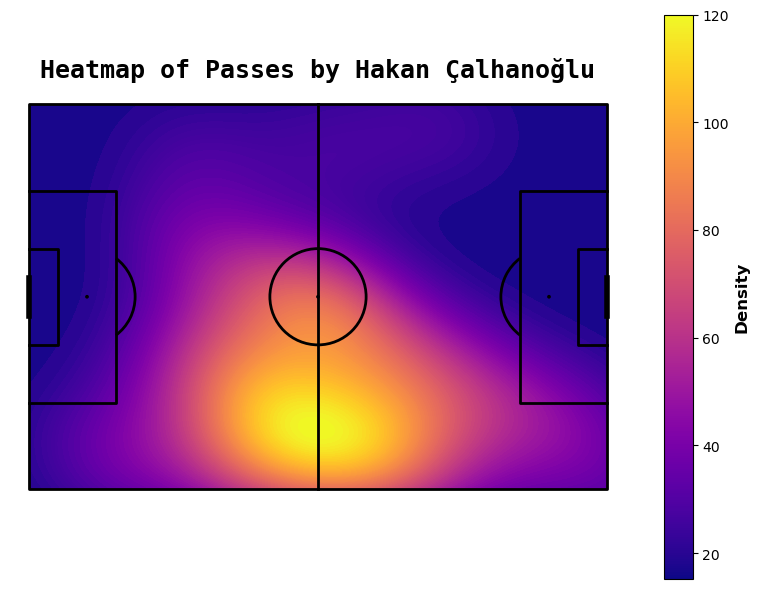

In [56]:
import pandas as pd
from statsbombpy import sb
from mplsoccer import Pitch
import matplotlib.pyplot as plt

# Match ID for Turkey vs Netherlands
match_id = 3942382

# Load event data for the specific match
df = sb.events(match_id=match_id)

# Filter to include only passes
df = df[df['type'] == 'Pass']

# Expand location coordinates
df[['x', 'y']] = df['location'].apply(pd.Series)

# Filter to include only successful passes
df = df[df['pass_outcome'].isna()]

# Define the player_id for the specific player (example: player_id = 12345)
player_id = 116587.0  # Update with the actual player ID
player_name = "Hakan Çalhanoğlu"
# Filter passes by the specific player
df_player = df[df['player_id'] == player_id]

# Create a pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='white', line_color='black', line_zorder=2)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Draw the pitch
pitch.draw(ax=ax)

# Create a heatmap for the specific player's passes
kde = pitch.kdeplot(
    df_player.x,
    df_player.y,
    fill=True,
    thresh=0,
    n_levels=100,
    cut=10,
    ax=ax,
    cmap='plasma'
)

# Customize plot
ax.set_title('Heatmap of Passes by {}'.format(player_name), fontfamily='monospace', fontsize=18, weight='bold')
ax.set_xlabel('Pitch Width (yards)', fontsize=12, weight='bold')
ax.set_ylabel('Pitch Length (yards)', fontsize=12, weight='bold')

# Remove axis
ax.axis('off')

# Add a colorbar
# Create a ScalarMappable object for the colorbar
sm = plt.cm.ScalarMappable(cmap='plasma', norm=plt.Normalize(vmin=df_player['x'].min(), vmax=df_player['x'].max()))
sm.set_array([])

# Create colorbar
cbar = plt.colorbar(sm, ax=ax, orientation='vertical')
cbar.set_label('Density', fontsize=12, weight='bold')


# Show the plot
plt.tight_layout()
plt.show()

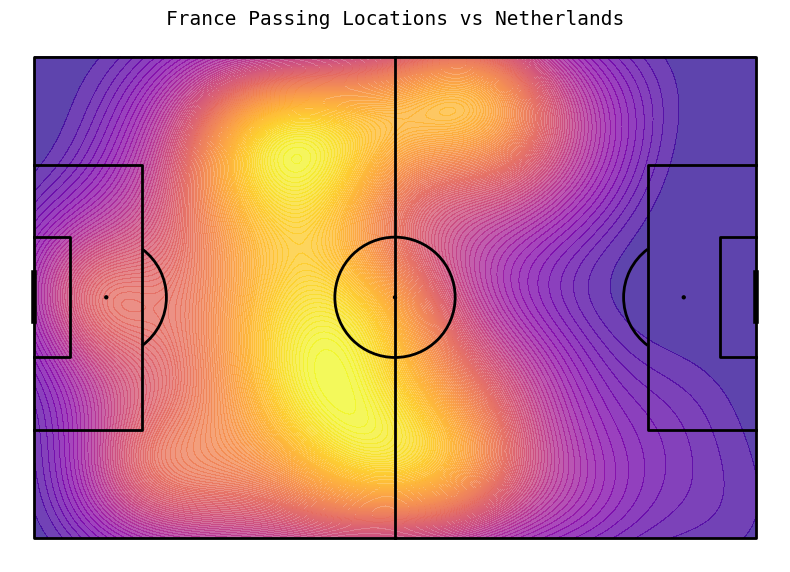

In [50]:
import pandas as pd
from statsbombpy import sb
from mplsoccer import Pitch
import matplotlib.pyplot as plt

# Match ID for Turkey vs Netherlands
match_id = 3942382

# Load event data for the specific match
df = sb.events(match_id=match_id)

# Filter to include only passes
df = df[df['type'] == 'Pass']

# Expand location coordinates
df[['x', 'y']] = df['location'].apply(pd.Series)

# Filter to include only successful passes
df = df[df['pass_outcome'].isna()]

# Create a pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='white', line_color='black', line_zorder=2)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))  # Adjust size for smaller visualization

# Draw the pitch
pitch.draw(ax=ax)

# Filter passes by France's team_id
france_team_id = 909  # Update this if France's team ID is different
df_fra = df[df['team_id'] == france_team_id]

# Create a heatmap for France's passes
kde = pitch.kdeplot(
    df_fra.x,
    df_fra.y,
    fill=True,
    thresh=0,
    n_levels=100,
    cut=10,
    ax=ax,
    cmap='plasma',  # Use any colormap from matplotlib
    alpha=0.75  # Adjust transparency for better visibility
)

# Add a title
ax.set_title('France Passing Locations vs Netherlands', fontsize=14, fontfamily='monospace')

# Remove axis for cleaner look
ax.axis('off')

# Show the plot
plt.tight_layout()
plt.show()

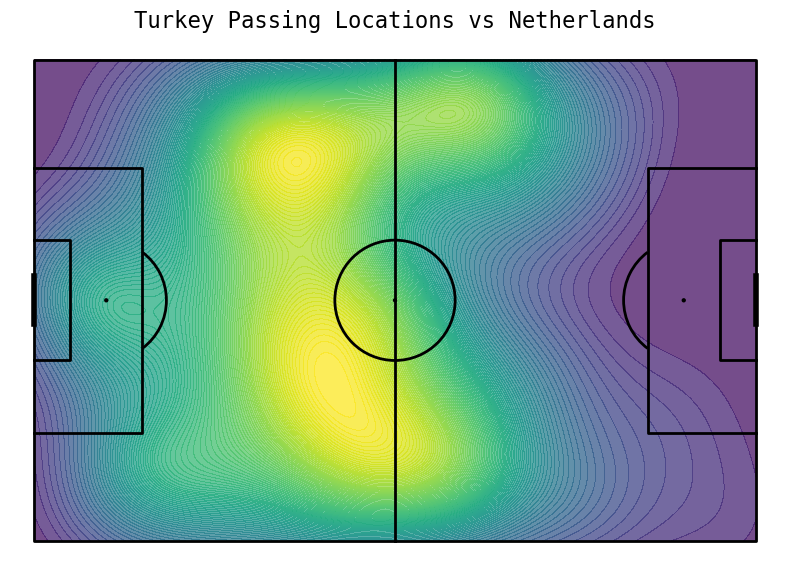

In [52]:
import pandas as pd
from statsbombpy import sb
from mplsoccer import Pitch
import matplotlib.pyplot as plt

# Match ID for Turkey vs Netherlands
match_id = 3942382

# Load event data for the specific match
df = sb.events(match_id=match_id)

# Filter to include only passes
df = df[df['type'] == 'Pass']

# Expand location coordinates
df[['x', 'y']] = df['location'].apply(pd.Series)

# Filter to include only successful passes
df = df[df['pass_outcome'].isna()]

# Create a pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='white', line_color='black', line_zorder=2)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))  # Adjust size as needed

# Draw the pitch
pitch.draw(ax=ax)

# Filter passes by Turkey's team_id (team_id = 909)
turkey_team_id = 909
df_tur = df[df['team_id'] == turkey_team_id]

# Create a heatmap for Turkey's passes
kde = pitch.kdeplot(
    df_tur.x,
    df_tur.y,
    fill=True,
    thresh=0,
    n_levels=100,
    cut=10,
    ax=ax,
    cmap='viridis',  # Use 'viridis' or any colormap from matplotlib
    alpha=0.75  # Adjust transparency for better visibility
)

# Add a title
ax.set_title('Turkey Passing Locations vs Netherlands', fontsize=16, fontfamily='monospace')

# Remove axis for cleaner look
ax.axis('off')

# Show the plot
plt.tight_layout()
plt.show()

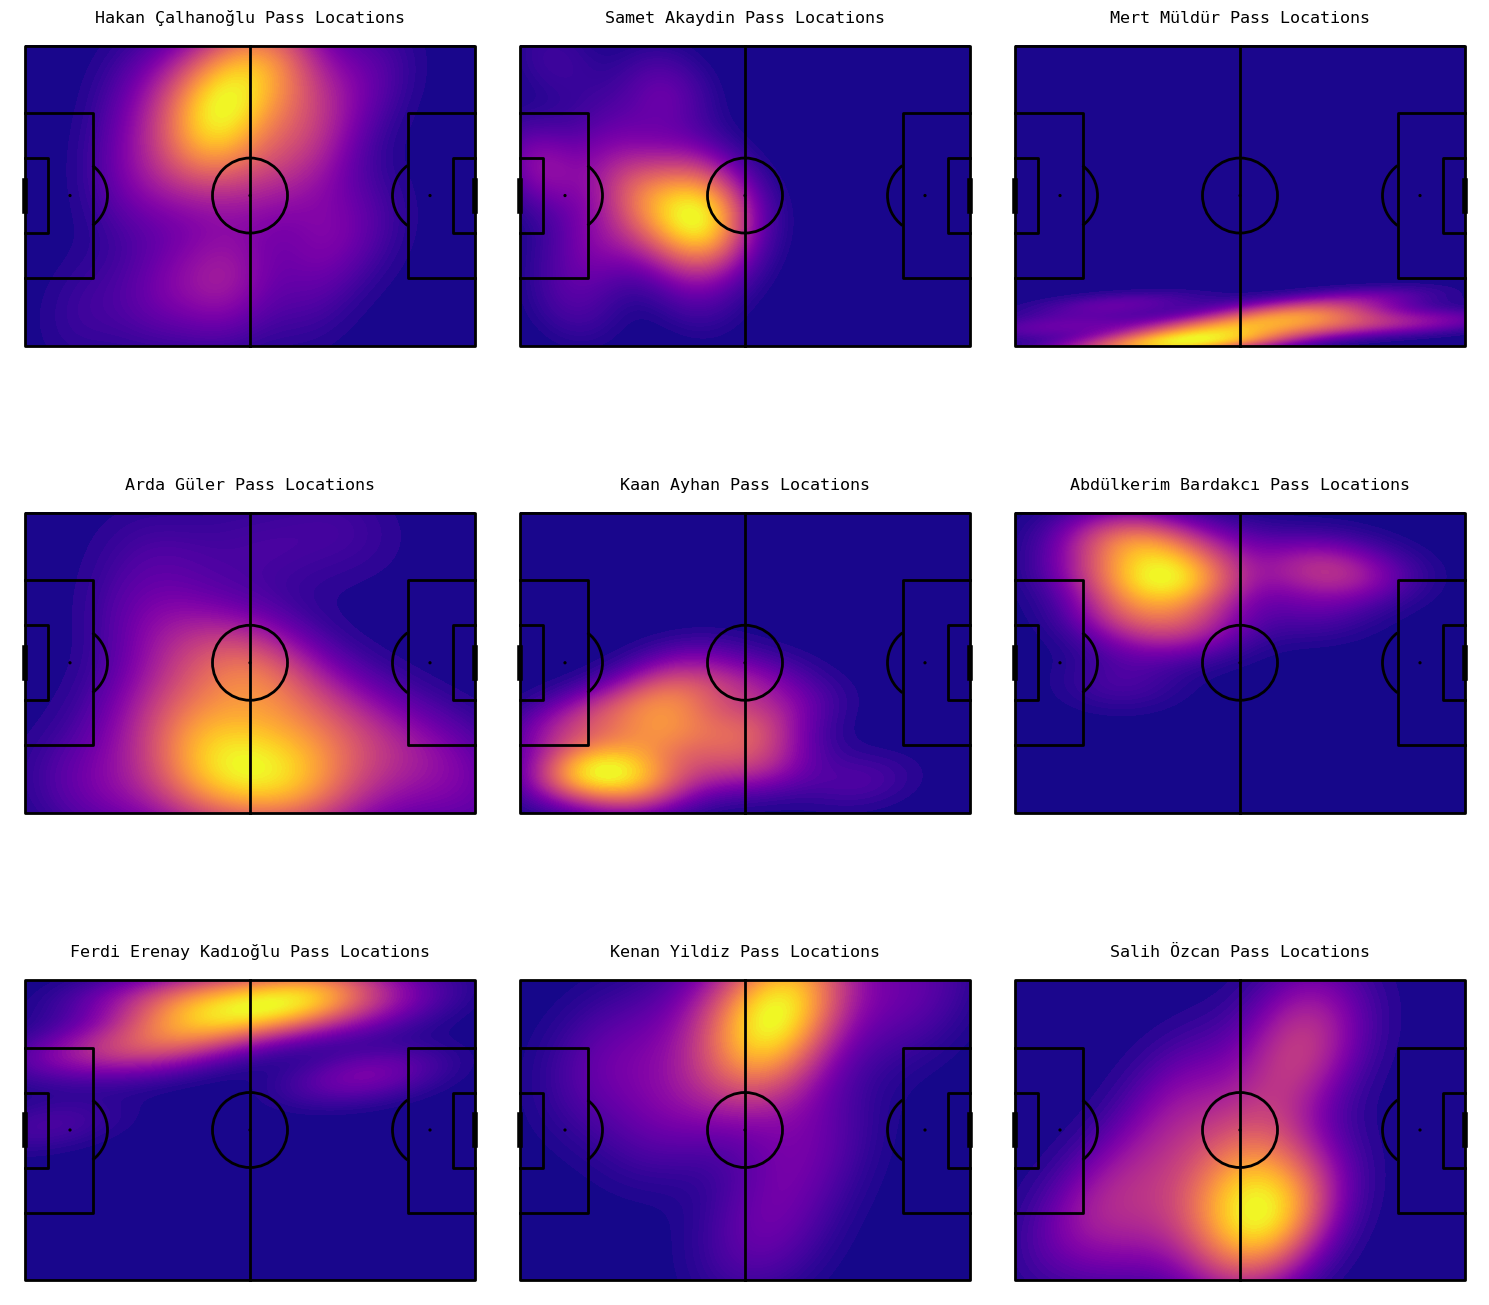

In [54]:
import pandas as pd
from statsbombpy import sb
from mplsoccer import Pitch
import matplotlib.pyplot as plt

# Match ID for Turkey vs Netherlands
match_id = 3942382

# Load event data for the specific match
df = sb.events(match_id=match_id)

# Filter to include only passes
df = df[df['type'] == 'Pass']

# Expand location coordinates
df[['x', 'y']] = df['location'].apply(pd.Series)

# Filter to include only successful passes
df = df[df['pass_outcome'].isna()]

# Create a pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='white', line_color='black', line_zorder=2)

# Filter passes by Turkey's team_id (team_id = 909)
turkey_team_id = 909
df_tur = df[df['team_id'] == turkey_team_id]

# Get the list of unique players
players = df_tur['player'].unique()

# Create a figure for plotting
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))  # Adjust the number of rows and columns as needed
axes = axes.flatten()  # Flatten to iterate easily

# Create heatmaps for each player
for i, player in enumerate(players):
    if i >= len(axes):
        break  # Avoid exceeding the number of subplots

    # Filter passes by the current player
    df_player = df_tur[df_tur['player'] == player]

    # Draw the pitch
    pitch.draw(ax=axes[i])

    # Create a heatmap for the current player's passes
    kde = pitch.kdeplot(
        df_player.x,
        df_player.y,
        fill=True,
        thresh=0,
        n_levels=80,
        cut=10,
        ax=axes[i],
        cmap='plasma'  # Adjust transparency for better visibility
    )

    # Add a title
    axes[i].set_title(f'{player} Pass Locations', fontsize=12, fontfamily='monospace')
    axes[i].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()